## Лабораторная работ 2: Знакомство с архитектурой YOLO для детекции объектов

В рамках данной лабораторной работы будет использоваться реализация YOLOv8 с открытым исходным кодом для обучения и запуска данной модели.

Перед началом работы стоит убедится, что установлена среда выполнения с использованием GPU. Изменить среду выполнения можно в настройке ресурсов Colab.

Для начала работы необходимо уставновить библиотеку с моделью в текущее окружение, выполнив ячейку ниже:

In [1]:
#!pip install ultralytics

Ознакомиться с документацией данной библиотеки можно по [следющуей ссылке](https://docs.ultralytics.com/).

Далее предлагается ознакомиться с функционалом для работы с библиотекой ultralytics для Python.

In [2]:
# Сначала следует загрузить тестовое изображение
!curl https://hyperbicycles.com/cdn/shop/files/hyper-collection-e-bikes-29in-mid-drive-mtb_5dfcef23-4a4c-46a8-81c2-16dca199774a_1800x.jpg?v=1657670368 -o test.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  2  441k    2  9644    0     0  15273      0  0:00:29 --:--:--  0:00:29 15307
100  441k  100  441k    0     0   431k      0  0:00:01  0:00:01 --:--:--  432k


In [3]:
!curl https://s.abcnews.com/images/Health/masks-tokyo-gty-ps-230314_1678802239571_hpMain.jpg -o test2.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  250k  100  250k    0     0   237k      0  0:00:01  0:00:01 --:--:--  238k


In [4]:
# Запуск модели самой быстрой YOLOv8-Nano (содержит наименьшее количество параметров)
!yolo predict model=yolov8n.pt source='test.jpg'

Ultralytics YOLOv8.0.187  Python-3.10.9 torch-2.0.1+cpu CPU (Intel Core(TM) i7-8650U 1.90GHz)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients

image 1/1 C:\Users\pavel\mobneyron\MobileNN\lab3\test.jpg: 416x640 1 person, 1 bicycle, 305.2ms
Speed: 6.8ms preprocess, 305.2ms inference, 14.8ms postprocess per image at shape (1, 3, 416, 640)
Results saved to runs\detect\predict
 Learn more at https://docs.ultralytics.com/modes/predict


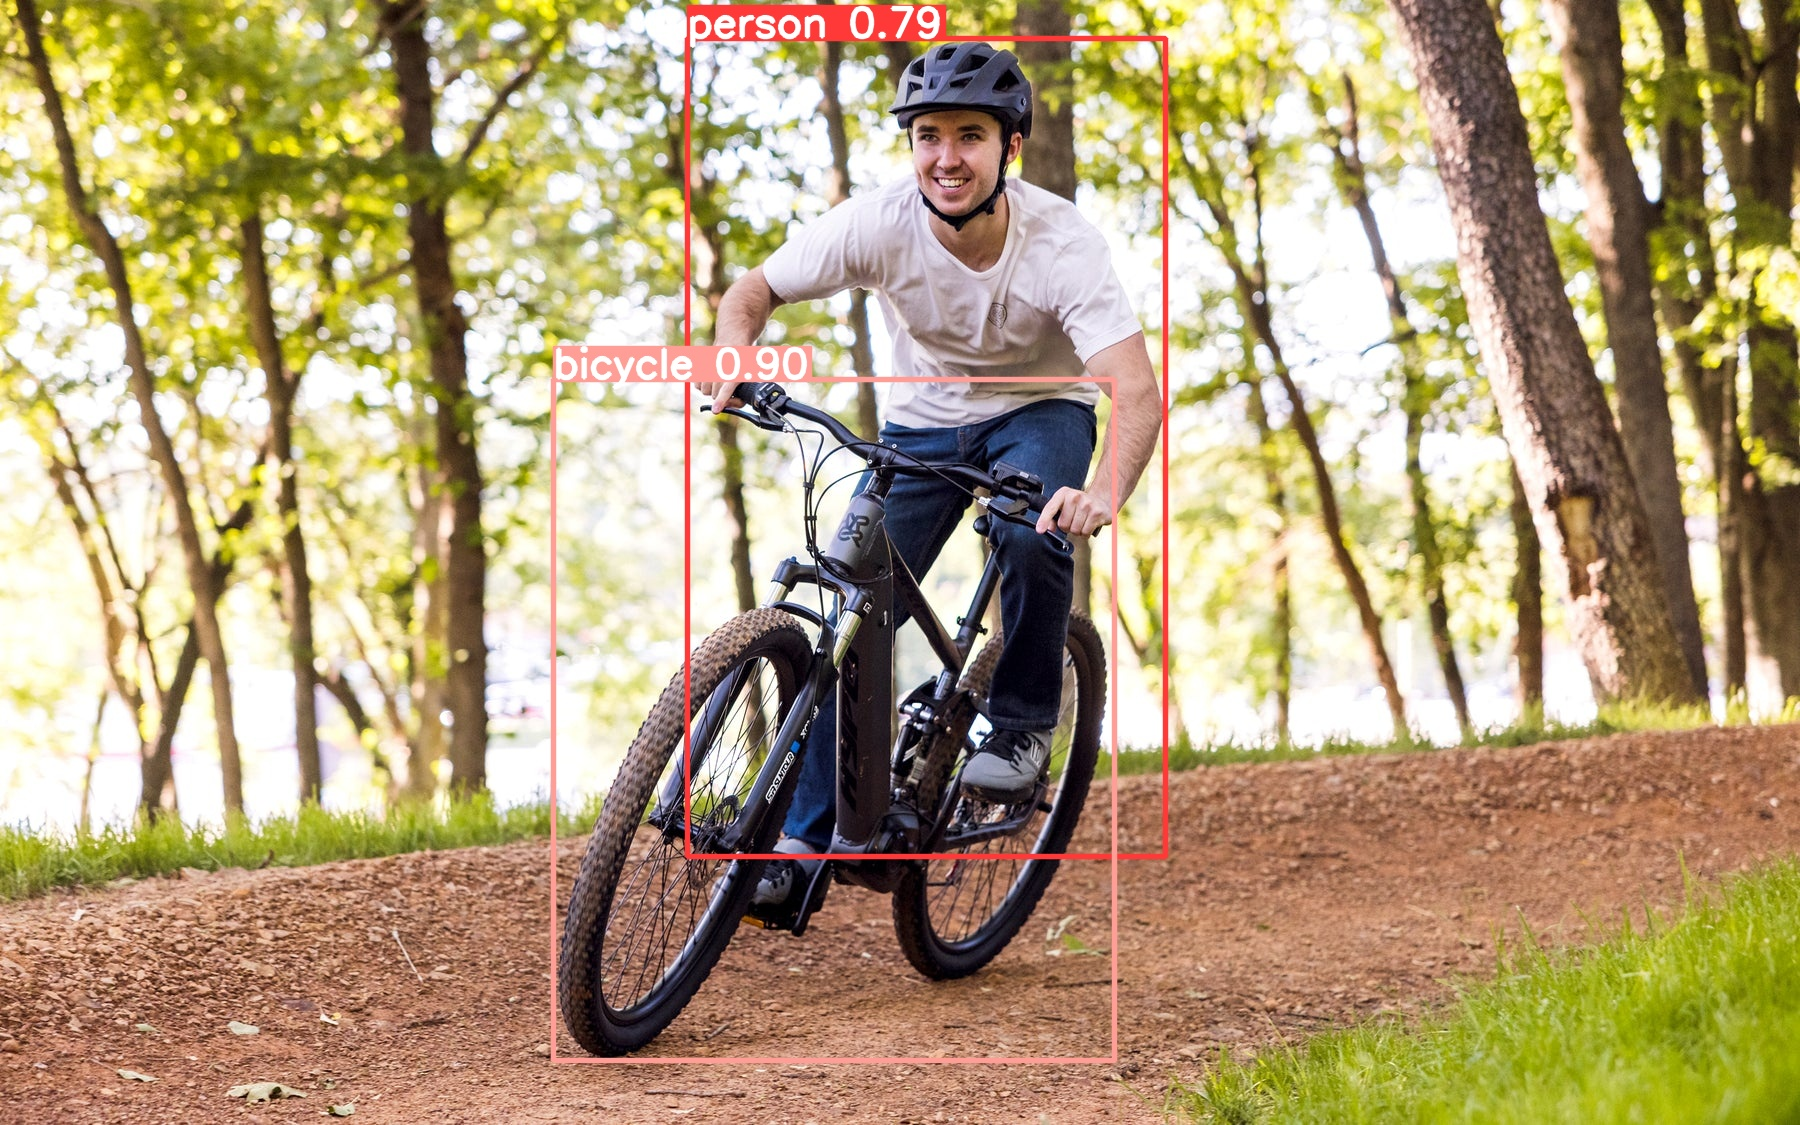

In [5]:
# Визуализация результата работы модели
# Импортируем функцию для отрисовки изображения напрямую в браузерной среде выполнения
from IPython.display import Image

Image(filename='runs/detect/predict/test.jpg', width=1000)

Выше были представлены консольные команды для запуска модели YOLO, но также данной библиотекой можно пользовать при реализации Python скриптоп, пример кода приведён в ячейках ниже.

In [6]:
from ultralytics import YOLO
#import cv2_imshow
import cv2

model = YOLO('yolov8n.pt')
results = model(['test2.jpg'])
result = results[0].cpu()

detection_visualization = result.plot()
detection_visualization = cv2.resize(detection_visualization, None, fx=1/2, fy=1/2)

cv2.namedWindow('custom window', cv2.WINDOW_KEEPRATIO)
cv2.imshow('custom window', detection_visualization)
cv2.resizeWindow('custom window', 800, 600)

cv2.waitKey(0)
cv2.destroyAllWindows()


0: 448x640 13 persons, 3 ties, 271.1ms
Speed: 8.1ms preprocess, 271.1ms inference, 6.1ms postprocess per image at shape (1, 3, 448, 640)


In [7]:
# Также возможно отрисовать детекции на кадре с помощью библиотеки OpenCV
import numpy as np

boxes = result.boxes.data[:, :4].numpy().astype(np.int32)    # Координаты прямоугольника вокруг найденного объекта
probs = result.boxes.conf.numpy()                            # Уверенность сети в данной детекции
cls = result.boxes.cls.numpy().astype(np.int32)              # Индексы имён классов
names = [result.names[c_idx] for c_idx in cls]               # Конвертация индексов в название классов

image = cv2.imread('test2.jpg', cv2.IMREAD_COLOR)  # Открытие цветного изображения (примечание: открывается в BGR)

detection_visualization = image.copy()

text_font = cv2.FONT_HERSHEY_DUPLEX
text_scale = 2.0
colors = [(50, 20, 200), (200, 20, 100)]
text_thickness = 5

for detecion_id in range(len(boxes)):
  target_object_name = names[detecion_id]
  target_object_box = boxes[detecion_id]  # XYXY format
  target_object_prob = float(probs[detecion_id])

  print('Box: {}, name: {}, confidence: {:.2f}'.format(target_object_box, target_object_name, target_object_prob))

  detection_visualization = cv2.rectangle(
      detection_visualization,
      tuple(target_object_box[:2]),
      tuple(target_object_box[2:]),
      colors[detecion_id % len(colors)],
      5
  )


for detecion_id in range(len(boxes)):
  target_object_name = names[detecion_id]
  target_object_box = boxes[detecion_id]
  target_object_prob = float(probs[detecion_id])

  input_text = '{} {:.2f}'.format(target_object_name, target_object_prob)

  (text_width, text_height), baseline = cv2.getTextSize(input_text, text_font, text_scale, text_thickness)

  detection_visualization = cv2.putText(
    detection_visualization,
    input_text,
    (target_object_box[0] + 10, target_object_box[1] + text_height + baseline),
    text_font,
    text_scale,
    colors[detecion_id % len(colors)],
    text_thickness
  )


detection_visualization = cv2.resize(detection_visualization, None, fx=1/2, fy=1/2)

cv2.namedWindow('custom window', cv2.WINDOW_KEEPRATIO)
cv2.imshow('custom window', detection_visualization)
cv2.resizeWindow('custom window', 800, 600)

cv2.waitKey(0)
cv2.destroyAllWindows()

Box: [1092  539 1848 1708], name: person, confidence: 0.92
Box: [1806 1028 2592 1716], name: person, confidence: 0.92
Box: [   2 1035  739 1717], name: person, confidence: 0.91
Box: [ 464  804 1155 1714], name: person, confidence: 0.89
Box: [ 253 1600  342 1724], name: tie, confidence: 0.74
Box: [1873  394 2500 1394], name: person, confidence: 0.74
Box: [   0  520  459 1574], name: person, confidence: 0.71
Box: [ 740  432 1278 1667], name: person, confidence: 0.69
Box: [  32  297  570 1073], name: person, confidence: 0.45
Box: [513 283 905 874], name: person, confidence: 0.42
Box: [2284  317 2591 1457], name: person, confidence: 0.39
Box: [1753   93 2261  807], name: person, confidence: 0.39
Box: [ 845   27 1293  552], name: person, confidence: 0.31
Box: [ 937  754 1041  824], name: tie, confidence: 0.29
Box: [1084  512 1344  894], name: person, confidence: 0.28
Box: [ 256 1599  385 1724], name: tie, confidence: 0.26


## Экспорт модели
Библиотека позволяет экспортировать модель YOLOv8 для использования на различных платфомах. Например формат ONNX хорошо оптимизирован для запуска сверточных нейронных сетей на процессорах с архитектурой x86, формат CoreML необзодим для запуска моделей на устройствах от компании Apple, формат модели фреймворка TensorFlow-Lite эффективно запускат модели на устройствах под операционной системой Android.
Ниже в ячейке представлены примеры экспорта модели в различные форматы через средсва Python.

In [8]:
# Для x86
save_path = model.export(format="onnx")
!echo "ONNX SAVE PATH: $save_path"; ls -lah $save_path

# Для iOS
#save_path = model.export(format="coreml")
#!echo "CoreML SAVE PATH: $save_path"; ls -lah $save_path

# Для Android
#save_path = model.export(format="tflite")
#!echo "TF-Lite SAVE PATH: $save_path"; ls -lah $save_path

Ultralytics YOLOv8.0.187  Python-3.10.9 torch-2.0.1+cpu CPU (Intel Core(TM) i7-8650U 1.90GHz)

PyTorch: starting from 'yolov8n.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 84, 8400) (6.2 MB)

ONNX: starting export with onnx 1.14.1 opset 17...
ONNX: export success  2.9s, saved as 'yolov8n.onnx' (12.2 MB)

Export complete (6.4s)
Results saved to C:\Users\pavel\mobneyron\MobileNN\lab3
Predict:         yolo predict task=detect model=yolov8n.onnx imgsz=640  
Validate:        yolo val task=detect model=yolov8n.onnx imgsz=640 data=coco.yaml  
Visualize:       https://netron.app


============== Diagnostic Run torch.onnx.export version 2.0.1+cpu ==============
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================

"ONNX SAVE PATH: yolov8n.onnx"; ls -lah yolov8n.onnx


#### Также библиотека предоставляет консольный функционал для экспорта моделей, пример запуска написан в ячейке ниже:

In [9]:
#!yolo export model=./runs/detect/train/weights/best.pt format=onnx simplify half

## Задание 1
Теперь попробуйте вернуться к исполняемой ячейке, где происходит скачивание изображения. Найдите в интернете любое изображение с объектами (люди, машины, элементы декора) и замените URL из ячейки на ссылку на выше изображание и произведите шаги с запуском модели и визуализции снова, с вашим изображанием. Также необходимо поменять имя изображения, например на `test2.jpg`.

Теперь попробуйте скачать видео файл и запустить на нём модель. Для этого запустите ячейки ниже:

In [12]:
# Сначала следует загрузить тестовое изображение
!curl https://avatars.dzeninfra.ru/get-zen_doc/49107/pub_5ac739b2482677727505d2cf_5ac73a40168a9101f112a97b/scale_1200 -o test3.jpg
#чтобы начать работы модели - убрать коммент
!yolo predict model=yolov8n.pt source='test3.jpg'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  1  281k    1  3231    0     0  14350      0  0:00:20 --:--:--  0:00:20 14958
100  281k  100  281k    0     0   606k      0 --:--:-- --:--:-- --:--:--  618k
Ultralytics YOLOv8.0.187  Python-3.10.9 torch-2.0.1+cpu CPU (Intel Core(TM) i7-8650U 1.90GHz)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients

image 1/1 C:\Users\pavel\mobneyron\MobileNN\lab3\test3.jpg: 448x640 1 truck, 1 sports ball, 1 chair, 288.5ms
Speed: 3.0ms preprocess, 288.5ms inference, 4.5ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs\detect\predict2
 Learn more at https://docs.ultralytics.com/modes/predict


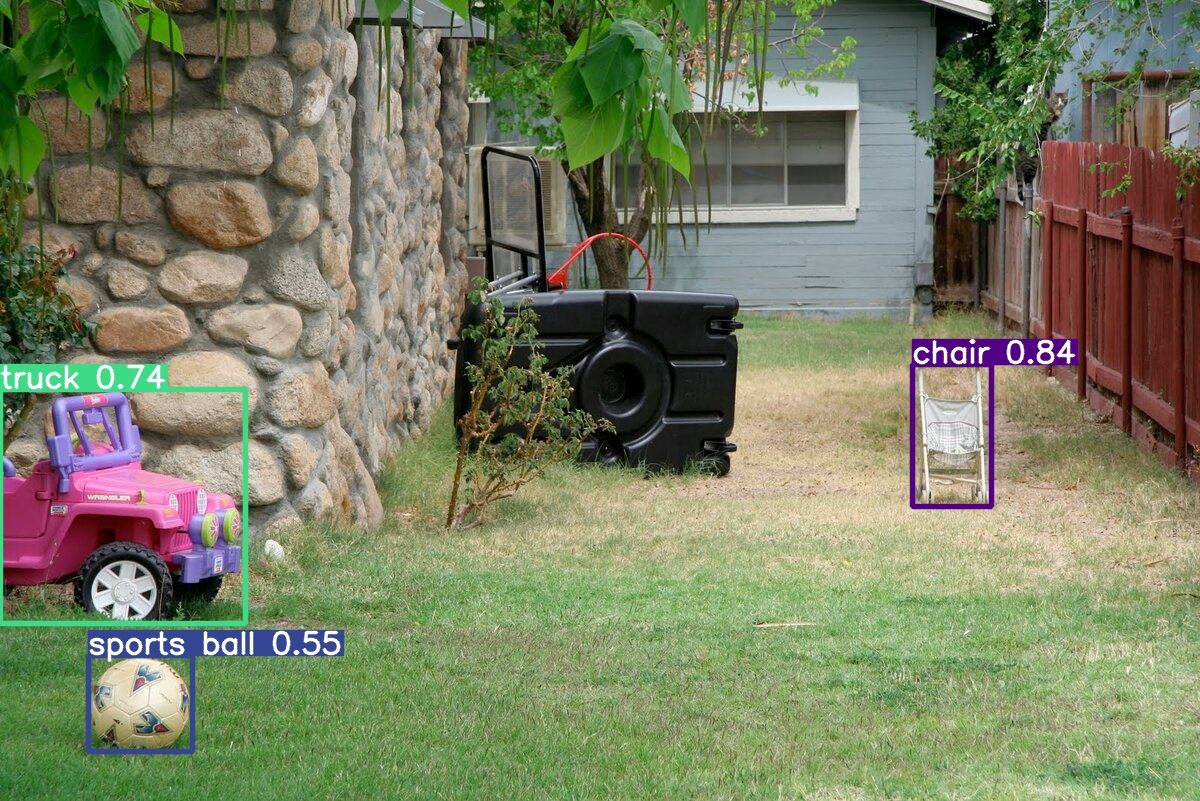

In [13]:
Image(filename='runs/detect/predict2/test3.jpg', width=1000)

In [ ]:
#!pip install pytube

In [14]:
from pytube import YouTube
#YouTube("https://www.youtube.com/watch?v=fLeJJPxua3E").streams.filter(progressive=True, file_extension='mp4').first().download('test_video')

In [15]:
#убрать комент, чтобы прогнать видос
#!yolo predict model=yolov8n.pt source='test_video/*' #device=0 #0-видюха, 1-проц, на видюхе не идет, ругается на cuda

Если видео не открывается, то скачайте файл из директории `runs/detect/predict3` и воспроизведите его локально на машине

In [16]:
#%%HTML
#<video width="1280" height="720" controls>
#<source src="runs/detect/predict5/Best Short Motivational Speech Video - 24 HOURS - 1-Minute Motivation 2.avi" type="video/avi">
#</video>
#убрать ''' чтобы запустить видос
'''
cap = cv2.VideoCapture("runs/detect/predict5/Best Short Motivational Speech Video - 24 HOURS - 1-Minute Motivation 2.avi")
ret, frame = cap.read()
while(cap.isOpened()):
    ret, frame = cap.read()
    cv2.imshow('frame',frame)
    if cv2.waitKey(1) & 0xFF == ord('q') or ret==False :
        cap.release()
        cv2.destroyAllWindows()
        break
    cv2.imshow('frame',frame)
'''

'\ncap = cv2.VideoCapture("runs/detect/predict5/Best Short Motivational Speech Video - 24 HOURS - 1-Minute Motivation 2.avi")\nret, frame = cap.read()\nwhile(cap.isOpened()):\n    ret, frame = cap.read()\n    cv2.imshow(\'frame\',frame)\n    if cv2.waitKey(1) & 0xFF == ord(\'q\') or ret==False :\n        cap.release()\n        cv2.destroyAllWindows()\n        break\n    cv2.imshow(\'frame\',frame)\n'

## Обучение собственной модели

Для обучения модели можно взять любой набора данных с сайта [Roboflow](https://universe.roboflow.com/).
Для примера возьмём набор данных детекции людей с [респираторными масками](https://universe.roboflow.com/joseph-nelson/mask-wearing/dataset/19#), чтобы его скачать, выполните код в ячейке ниже:

In [17]:
#!pip install roboflow
'''
from roboflow import Roboflow
rf = Roboflow(api_key="Hrz3pdBkU0UwCowauRnm")
project = rf.workspace("joseph-nelson").project("mask-wearing")
dataset = project.version(19).download("yolov8")
'''

'\nfrom roboflow import Roboflow\nrf = Roboflow(api_key="Hrz3pdBkU0UwCowauRnm")\nproject = rf.workspace("joseph-nelson").project("mask-wearing")\ndataset = project.version(19).download("yolov8")\n'

Для оубчения моделей из библиотеки ultralytics сначала необходимо подготовить конфигурационный файл, если набор данных скачан из Roboflow, он сгенерирован автоматически и пригалается к набору данных.

In [18]:
!cat Mask-Wearing-19/data.yaml

'cat' is not recognized as an internal or external command,
operable program or batch file.


Для корректного запуска обучения необходимо поправить пути до директорий с изображениями, так как скрипт обучения YOLO будет искать полные пути до директорий с изображениями и разметкой.

In [19]:
import pathlib
import yaml
import os


def delete_first_folder(p: str) -> str:
    return str(pathlib.Path(*pathlib.Path(p).parts[1:]))

def add_root_path(p: str) -> str:
    return os.path.join(os.getcwd(), p)#переделали для винды

with open('Mask-Wearing-19/data.yaml', 'r') as f:
    data = yaml.safe_load(f)

data['train'] = add_root_path(data['train'])
data['val'] = add_root_path(data['val'])
data['test'] = add_root_path('Mask-Wearing-19/' + delete_first_folder(data['test']))

with open('Mask-Wearing-19/fixed_data.yaml', 'w') as f:
    yaml.safe_dump(data, f)

data

{'names': ['mask', 'no-mask'],
 'nc': 2,
 'roboflow': {'license': 'Public Domain',
  'project': 'mask-wearing',
  'url': 'https://universe.roboflow.com/joseph-nelson/mask-wearing/dataset/19',
  'version': 19,
  'workspace': 'joseph-nelson'},
 'test': 'C:\\Users\\pavel\\mobneyron\\MobileNN\\lab3\\Mask-Wearing-19/test\\images',
 'train': 'C:\\Users\\pavel\\mobneyron\\MobileNN\\lab3\\Mask-Wearing-19/train/images',
 'val': 'C:\\Users\\pavel\\mobneyron\\MobileNN\\lab3\\Mask-Wearing-19/valid/images'}

Теперь можно запустить обучение YOLOv8, для обучение берётся самая легковесная архитектура YOLOv8-Nano.

In [20]:
# Обучение модели Nano на 10 эпохах с размером входного изображения 480 пикселей
#os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"- не надо
#переустановил numpy
#считал 8 часов
#!yolo detect train model=yolov8n.pt data="Mask-Wearing-19/fixed_data.yaml" epochs=20 imgsz=640

## Задание 2

1.   Запустите полученную модель на изображениях из интернета и отрисуйте результат детекции (смотрите ячейки выше).
2.   Экспортируйте модель в формат ONNX (смотрите ячейки выше)

Примечание: для выполнения данных заданий создавайте ячейки ниже текущей

In [21]:
!curl https://img.the-steppe.com/images/news/5941-FE9D8Y1c.jpg -o test4.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:02 --:--:--     0
 25  328k   25 84709    0     0  28831      0  0:00:11  0:00:02  0:00:09 28861
100  328k  100  328k    0     0   101k      0  0:00:03  0:00:03 --:--:--  101k


In [22]:
from ultralytics import YOLO
#import cv2_imshow
import cv2

model = YOLO('runs/detect/train/weights/best.pt')
results = model(['test4.jpg'])
result = results[0].cpu()

detection_visualization = result.plot()
detection_visualization = cv2.resize(detection_visualization, None, fx=1/2, fy=1/2)

cv2.namedWindow('custom window', cv2.WINDOW_KEEPRATIO)
cv2.imshow('custom window', detection_visualization)
cv2.resizeWindow('custom window', 800, 600)

cv2.waitKey(0)
cv2.destroyAllWindows()


0: 448x640 9 masks, 275.6ms
Speed: 9.4ms preprocess, 275.6ms inference, 2.1ms postprocess per image at shape (1, 3, 448, 640)


In [23]:
save_path = model.export(format="onnx")
!echo "ONNX SAVE PATH: $save_path"; ls -lah $save_path

Ultralytics YOLOv8.0.187  Python-3.10.9 torch-2.0.1+cpu CPU (Intel Core(TM) i7-8650U 1.90GHz)

PyTorch: starting from 'runs\detect\train\weights\best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 6, 8400) (5.9 MB)

ONNX: starting export with onnx 1.14.1 opset 17...
ONNX: export success  2.1s, saved as 'runs\detect\train\weights\best.onnx' (11.7 MB)

Export complete (5.2s)
Results saved to C:\Users\pavel\mobneyron\MobileNN\lab3\runs\detect\train\weights
Predict:         yolo predict task=detect model=runs\detect\train\weights\best.onnx imgsz=640  
Validate:        yolo val task=detect model=runs\detect\train\weights\best.onnx imgsz=640 data=Mask-Wearing-19/fixed_data.yaml  
Visualize:       https://netron.app


============== Diagnostic Run torch.onnx.export version 2.0.1+cpu ==============
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================

"ONNX SAVE PATH: runs\detect\train\weights\best.onnx"; ls -lah runs\detect\train\weights\best.onnx


Вы можете скачать полученную `.onnx` модель (или взять из предыдущего экспорта модели) на локальную машину. Далее необходимо открыть сайт [netron.app](https://netron.app/) и нажав "Open Model", выбрать файл с вашей onnx моделью, после чего данный сервис отрисует послойно всю архитектуру сети.

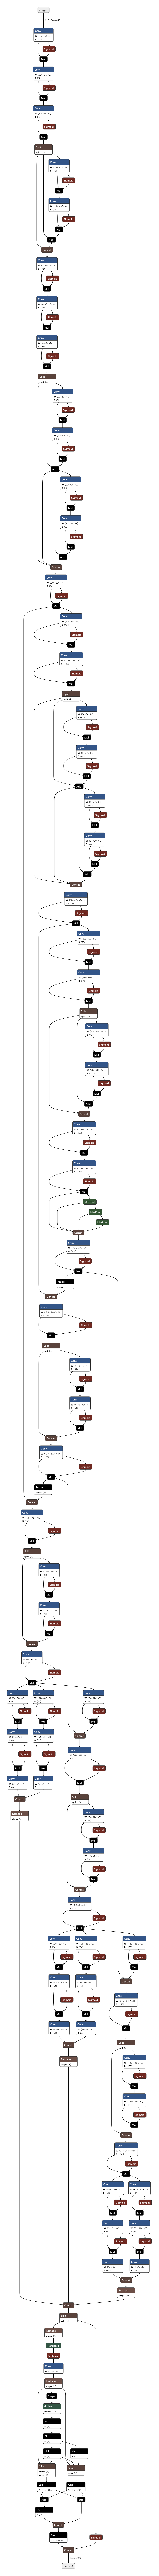

In [24]:
Image(filename='best.onnx.png', width=400)

## Архитектура YOLOv8

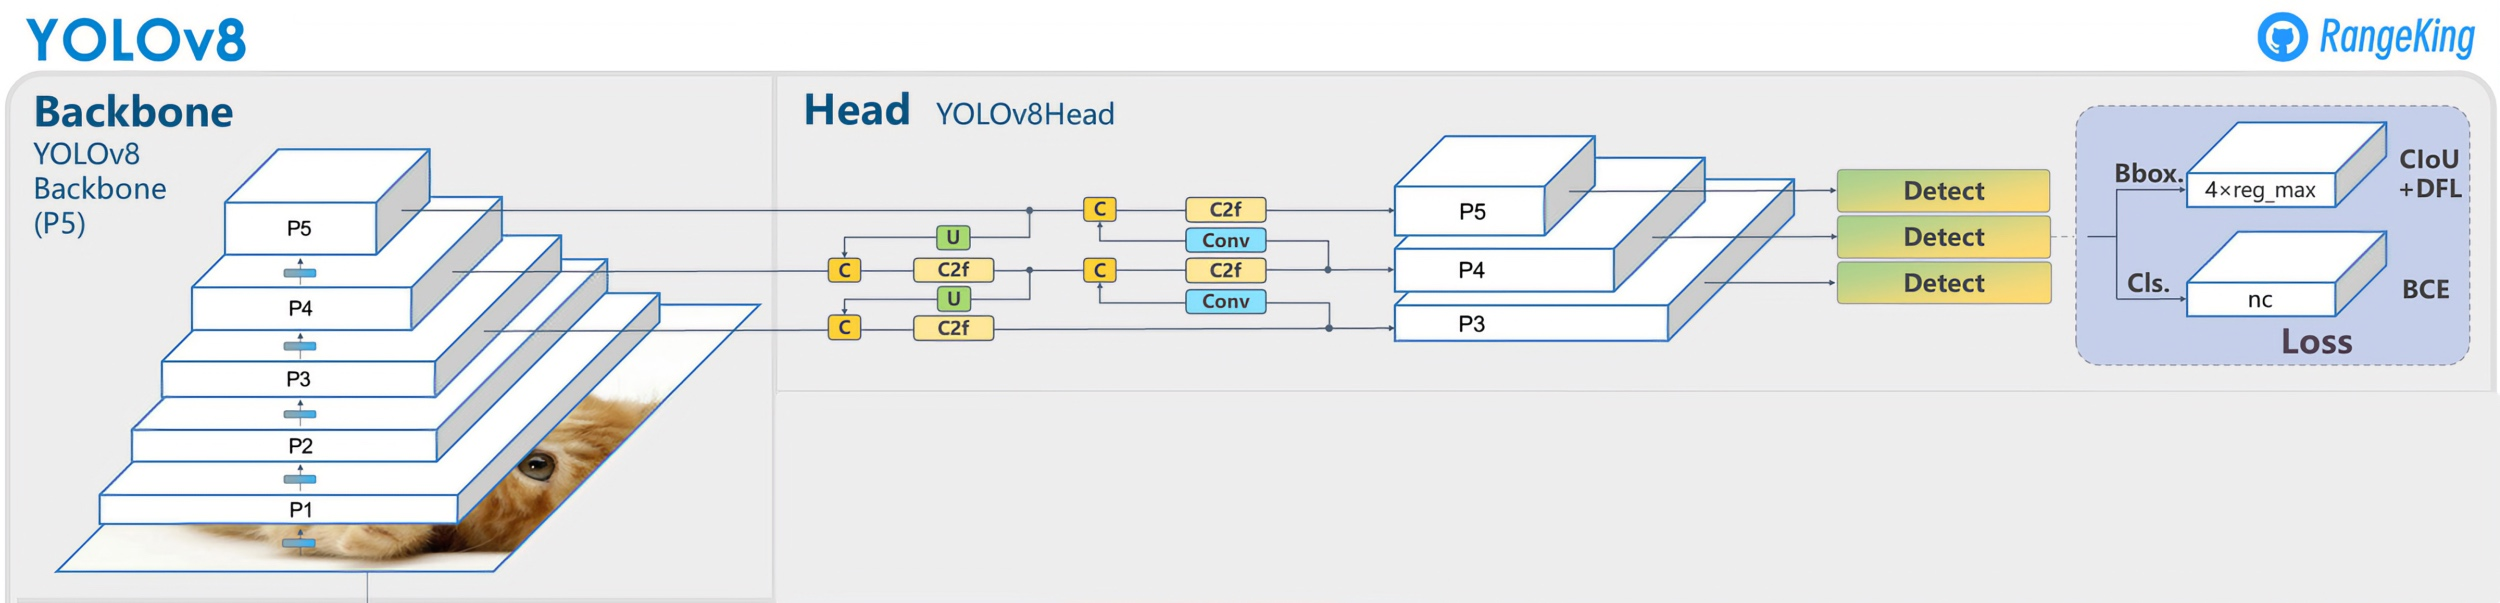
Схема архитектуры

Архитектура YOLOv8 является anchor-free, то есть модель учится напрямую находить координаты объектов на изображении, а не тренируется вычислять коэффициенты для масштрабирования и смещения готовых прямоугольников, чтобы они совпадали с границами объекта.

Пример визуализцаии anchor (якоря) у архитектуры YOLOv5:

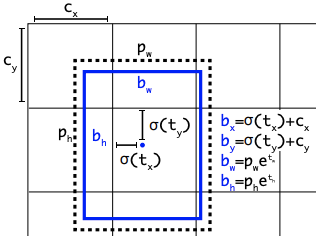

## Запуск ONNX модели
Для сравнения производительности фреймворков запустим модель YOLOv8 с помощью фреймворка PyTorch и библиотеки ONNXRuntime для запуска ONNX моделей.

In [25]:
torch_model = YOLO('yolov8n.pt', task='detect')
onnx_model = YOLO('yolov8n.onnx', task='detect')

# Делаем "пустые" запуски, чтобы модели полностью загрузились в память
_ = torch_model([image])
_ = onnx_model([image])


0: 448x640 13 persons, 3 ties, 244.7ms
Speed: 6.6ms preprocess, 244.7ms inference, 4.5ms postprocess per image at shape (1, 3, 448, 640)
Loading yolov8n.onnx for ONNX Runtime inference...

0: 640x640 14 persons, 3 ties, 372.0ms
Speed: 20.8ms preprocess, 372.0ms inference, 29.2ms postprocess per image at shape (1, 3, 640, 640)


In [26]:
%%time
# Замеряем скорость
_ = torch_model([image])


0: 448x640 13 persons, 3 ties, 297.0ms
Speed: 28.8ms preprocess, 297.0ms inference, 4.8ms postprocess per image at shape (1, 3, 448, 640)


CPU times: total: 688 ms
Wall time: 348 ms


In [27]:
%%time
_ = onnx_model([image])


0: 640x640 14 persons, 3 ties, 173.9ms
Speed: 10.9ms preprocess, 173.9ms inference, 9.2ms postprocess per image at shape (1, 3, 640, 640)


CPU times: total: 688 ms
Wall time: 217 ms


In [28]:
#!pip install onnxruntime

## Постобработка результатов модели: Non-maximum suppression
Кроме конвертации в CoreML шаг постобработки не переносится.
Для этого предлагается ознакомиться с его реализацией более детально.
Для начала запустите все ячейки ниже на изображении со случайными пикселями.

Пример применения NMS:

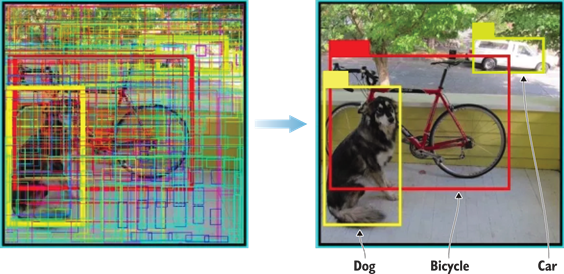

## Задание 3
Замените случайно сгенерированное изображение x на реальное обработанное изображение (примеры обработки можете найти в предыдущей лабораторной работе).
После замены запустите все ячейки ниже ещё раз.

In [38]:
import numpy as np
import onnxruntime as ort

ort_model = ort.InferenceSession(
    'runs/detect/train/weights/best.onnx',
    providers=['CPUExecutionProvider']
)
image = cv2.imread('test4.jpg', cv2.IMREAD_COLOR)  # Открытие цветного изображения (примечание: открывается в BGR)


model_input_name = ort_model.get_inputs()[0].name
model_output_name = ort_model.get_outputs()[0].name

print(' Input name: {}\n Output name: {}'.format(model_input_name, model_output_name))

#x = np.random.rand(1, 3, 640, 640).astype(np.float32)
x = cv2.resize(image, (640, 640)).astype(np.float32).transpose(2, 0, 1)[None] / 255.0

out = ort_model.run(
    [model_output_name],
    {model_input_name: x}
)

print(out[0].shape)

 Input name: images
 Output name: output0
(1, 6, 8400)


Выход модели YOLO состоит из координат детекций и распределений вероятностей по всем классам, а также значении степени уверенности сети. И 2-я размерность состоит из:
4 (xywh) + 80 (количество классов + фон)

In [39]:
import torch
import torchvision

def xywh2xyxy(x):
  y = np.copy(x)
  y[..., 0] = x[..., 0] - x[..., 2] / 2  # top left x
  y[..., 1] = x[..., 1] - x[..., 3] / 2  # top left y
  y[..., 2] = x[..., 0] + x[..., 2] / 2  # bottom right x
  y[..., 3] = x[..., 1] + x[..., 3] / 2  # bottom right y
  return y

kx = image.shape[1] / 640
ky = image.shape[0] / 640

elem_out = out[0].transpose(0, 2, 1).squeeze()
print(elem_out.shape)

boxes = elem_out[:, :4] * np.array([[kx, ky, kx, ky]])
boxes = xywh2xyxy(boxes)
probs_max_value = elem_out[:, 4:].max(axis=1)
probs_max_index = elem_out[:, 4:].argmax(axis=1)

threshold = 0.25

filter_mask = probs_max_value > threshold

f_boxes = boxes[filter_mask].astype(np.int32)
f_probs_max_value = probs_max_value[filter_mask]
f_probs_max_index = probs_max_index[filter_mask]

keeps_elements = torchvision.ops.nms(
    torch.from_numpy(f_boxes.astype(np.float32)),
    torch.from_numpy(f_probs_max_value),
    0.45
  )

f_boxes = f_boxes[keeps_elements]
f_probs_max_value = f_probs_max_value[keeps_elements]

# if len(f_boxes.shape) == 1:
#   f_boxes = f_boxes[None]

print(f_boxes.shape)

(8400, 6)
(3, 4)


In [40]:
# Отрисовка результатов

image = cv2.imread('test4.jpg', cv2.IMREAD_COLOR)  # Открытие цветного изображения (примечание: открывается в BGR)

detection_visualization = image.copy()

for detecion_id in range(len(f_boxes)):
    target_object_box = f_boxes[detecion_id]  # XcYcWH format
    target_object_prob = float(f_probs_max_value[detecion_id])

    detection_visualization = cv2.rectangle(
        detection_visualization,
        tuple(target_object_box[:2]),
        tuple(target_object_box[2:]),
        colors[detecion_id % len(colors)],
        5
    )

detection_visualization = cv2.resize(detection_visualization, None, fx=1/2, fy=1/2)

#cv2_imshow(detection_visualization)
cv2.namedWindow('custom window', cv2.WINDOW_KEEPRATIO)
cv2.imshow('custom window', detection_visualization)
cv2.resizeWindow('custom window', 800, 600)

cv2.waitKey(0)
cv2.destroyAllWindows()